In [1]:
from FastMapSVM.fastmapsvm import FastMapSVM
import sys
#sys.path.append("..") #Please adjust the code based on the path of fastmapsvm.py.
import numpy as np
import editdistance
import pandas as pd
from scipy.spatial import distance
from tqdm import tqdm
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u

import numpy as np
# from helpers.SimulationAnalysis import readHlist
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')
from scipy.ndimage import gaussian_filter
# font_path = 'cmunrm.ttf'
# font_manager.fontManager.addfont(font_path)
# prop = font_manager.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = prop.get_name()
# plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams.update(
    {
        'text.usetex': True,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

## Cuts (Attempt) ##

In [ ]:
real = pd.read_csv("data/union3.csv", skiprows = 0)

# run catalogue 3 --> 
# do one run that is [::4] ~50,000 objects
# do one run with ALL objects ~200,000 objects

# Zou HSC, z > 1
real1 = real[(real.z > 1) & (real.cat == 3)]

# WH22, z > 1
real2 = real[(real.z > 1) & (real.cat == 4)]

# Zou DESI, 0.6 < z < 1
real3 = real[(real.z < 1) & (real.z > 0.6) & (real.cat == 2)]
real3_c = real[(real.z < 1) & (real.z > 0.6) & (real.cat == 2)][::4]

# Zou DES, 0.6 < z < 1
real4 = real[(real.z < 1) & (real.z > 0.6) & (real.cat == 1)]

# WH22, 0.6 < z < 1
real5 = real[(real.z < 1) & (real.z > 0.6) & (real.cat == 4)]

# make new one SDSS (updated) --> to be changed
real6 = real[(real.z < 0.6) & (real.z > 0.05) & (real.cat.isin([0, 4]))]

# Zou DESI, 0.05 < z < 0.6
real7 = real[(real.z < 0.6) & (real.z > 0.05) & (real.cat == 2)]

In [ ]:
real7

In [ ]:
df = real7.reset_index(drop=True)


c = SkyCoord(df['amf_ra'],df['amf_dec'],frame='icrs',unit='deg')
df['glat'] = c.galactic.b.degree
df['glon'] = c.galactic.l.degree
df['i100'] = np.genfromtxt('output/510u3C7/pr100.csv',delimiter=', ')
df['i143'] = np.genfromtxt('output/510u3C7/pr143.csv',delimiter=', ')
df['i217'] = np.genfromtxt('output/510u3C7/pr217.csv',delimiter=', ')
df['i353'] = np.genfromtxt('output/510u3C7/pr353.csv',delimiter=', ')
df['i545'] = np.genfromtxt('output/510u3C7/pr545.csv',delimiter=', ')
df['i857'] = np.genfromtxt('output/510u3C7/pr857.csv',delimiter=', ')
df['i090'] = np.genfromtxt('output/510u3C7/ar90.csv',delimiter=', ')
df['i150'] = np.genfromtxt('output/510u3C7/ar150.csv',delimiter=', ')
df['i220'] = np.genfromtxt('output/510u3C7/ar220.csv',delimiter=', ')
df['iros'] = np.genfromtxt('output/510u3C7/rr.csv',delimiter=', ')
df['i12'] = np.genfromtxt('output/510u3C7/ir12.csv',delimiter=', ')
df['i25'] = np.genfromtxt('output/510u3C7/ir25.csv',delimiter=', ')
df['i60'] = np.genfromtxt('output/510u3C7/ir60.csv',delimiter=', ')
df['i1002'] = np.genfromtxt('output/510u3C7/ir100.csv',delimiter=', ')
df['i100_r'] = np.genfromtxt('output/510u3C7/pr100_r.csv',delimiter=', ')
df['i143_r'] = np.genfromtxt('output/510u3C7/pr143_r.csv',delimiter=', ')
df['i217_r'] = np.genfromtxt('output/510u3C7/pr217_r.csv',delimiter=', ')
df['i353_r'] = np.genfromtxt('output/510u3C7/pr353_r.csv',delimiter=', ')
df['i545_r'] = np.genfromtxt('output/510u3C7/pr545_r.csv',delimiter=', ')
df['i857_r'] = np.genfromtxt('output/510u3C7/pr857_r.csv',delimiter=', ')
df['i090_r'] = np.genfromtxt('output/510u3C7/ar90_r.csv',delimiter=', ')
df['i150_r'] = np.genfromtxt('output/510u3C7/ar150_r.csv',delimiter=', ')
df['i220_r'] = np.genfromtxt('output/510u3C7/ar220_r.csv',delimiter=', ')
df['iros_r'] = np.genfromtxt('output/510u3C7/rr_r.csv',delimiter=', ')
df['i12_r'] = np.genfromtxt('output/510u3C7/ir12_r.csv',delimiter=', ')
df['i25_r'] = np.genfromtxt('output/510u3C7/ir25_r.csv',delimiter=', ')
df['i60_r'] = np.genfromtxt('output/510u3C7/ir60_r.csv',delimiter=', ')
df['i1002_r'] = np.genfromtxt('output/510u3C7/ir100_r.csv',delimiter=', ')

# If ACT included
df = df[df.i090!=-9999].reset_index(drop = True)
#df = df.reset_index(drop = True)

# If needed to shuffle
from sklearn.utils import shuffle
df = shuffle(df)

df['cluster'] = 1
df

In [ ]:
df = df[:120000]
df

In [ ]:
df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.genfromtxt('output/510u3V/pv100.csv',delimiter=', ')
df2['i143'] = np.genfromtxt('output/510u3V/pv143.csv',delimiter=', ')
df2['i217'] = np.genfromtxt('output/510u3V/pv217.csv',delimiter=', ')
df2['i353'] = np.genfromtxt('output/510u3V/pv353.csv',delimiter=', ')
df2['i545'] = np.genfromtxt('output/510u3V/pv545.csv',delimiter=', ')
df2['i857'] = np.genfromtxt('output/510u3V/pv857.csv',delimiter=', ')
df2['i090'] = np.genfromtxt('output/510u3V/av90.csv',delimiter=', ')
df2['i150'] = np.genfromtxt('output/510u3V/av150.csv',delimiter=', ')
df2['i220'] = np.genfromtxt('output/510u3V/av220.csv',delimiter=', ')
df2['iros'] = np.genfromtxt('output/510u3V/rv.csv',delimiter=', ')
df2['i12'] = np.genfromtxt('output/510u3V/iv12.csv',delimiter=', ')
df2['i25'] = np.genfromtxt('output/510u3V/iv25.csv',delimiter=', ')
df2['i60'] = np.genfromtxt('output/510u3V/iv60.csv',delimiter=', ')
df2['i1002'] = np.genfromtxt('output/510u3V/iv100.csv',delimiter=', ')
df2['i100_r'] = np.genfromtxt('output/510u3V/pv100_r.csv',delimiter=', ')
df2['i143_r'] = np.genfromtxt('output/510u3V/pv143_r.csv',delimiter=', ')
df2['i217_r'] = np.genfromtxt('output/510u3V/pv217_r.csv',delimiter=', ')
df2['i353_r'] = np.genfromtxt('output/510u3V/pv353_r.csv',delimiter=', ')
df2['i545_r'] = np.genfromtxt('output/510u3V/pv545_r.csv',delimiter=', ')
df2['i857_r'] = np.genfromtxt('output/510u3V/pv857_r.csv',delimiter=', ')
df2['i090_r'] = np.genfromtxt('output/510u3V/av90_r.csv',delimiter=', ')
df2['i150_r'] = np.genfromtxt('output/510u3V/av150_r.csv',delimiter=', ')
df2['i220_r'] = np.genfromtxt('output/510u3V/av220_r.csv',delimiter=', ')
df2['iros_r'] = np.genfromtxt('output/510u3V/rv_r.csv',delimiter=', ')
df2['i12_r'] = np.genfromtxt('output/510u3V/iv12_r.csv',delimiter=', ')
df2['i25_r'] = np.genfromtxt('output/510u3V/iv25_r.csv',delimiter=', ')
df2['i60_r'] = np.genfromtxt('output/510u3V/iv60_r.csv',delimiter=', ')
df2['i1002_r'] = np.genfromtxt('output/510u3V/iv100_r.csv',delimiter=', ')

# Alpha re-scaling to increase sample size, in principle should just create more samples
df2u = df2.copy()
df2u.loc[::2,'i100':]*=1.1
df2u2 = df2.copy()
df2u2.loc[1::2,'i100':]*=1.1

df2d = df2.copy()
df2d.loc[1::2,'i100':]*=0.9
df2d2 = df2.copy()
df2d2.loc[::2,'i100':]*=0.9

df2 = pd.concat([df2,df2u,df2d,df2u2,df2d2]).reset_index(drop=True)
from sklearn.utils import shuffle
df2 = shuffle(df2)

# If ACT included
df2 = df2[df2.i090!=-9999].reset_index(drop=True)
#df2 = df2.reset_index(drop = True)

df2['cluster'] = 0

# We want equal sample sizes
df2 = df2[:len(df)]
df2

## Old Fullsky - Random ##

In [ ]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u

# output_k/510u2/pf100.csv has Old Fullsky - Random

# The more points here the better
glon = []
glat = []
for lon in np.linspace(0,360,317):
    for lat in np.linspace(-90,90,317):
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

dfsky = pd.DataFrame()#pd.read_csv('data/full_sky_decs.csv')[['decs']]
# dfsky['ras'] = pd.read_csv('data/full_sky_ras.csv')[['ras']]

dfsky['glat'] = glat
dfsky['glon'] = glon
dfsky['i100'] = np.genfromtxt('output_k/510u2/pf100.csv',delimiter=', ')
dfsky['i143'] = np.genfromtxt('output_k/510u2/pf143.csv',delimiter=', ')
dfsky['i217'] = np.genfromtxt('output_k/510u2/pf217.csv',delimiter=', ')
dfsky['i353'] = np.genfromtxt('output_k/510u2/pf353.csv',delimiter=', ')
dfsky['i545'] = np.genfromtxt('output_k/510u2/pf545.csv',delimiter=', ')
dfsky['i857'] = np.genfromtxt('output_k/510u2/pf857.csv',delimiter=', ')
dfsky['i090'] = np.genfromtxt('output_k/510u2/af90.csv',delimiter=', ')
dfsky['i150'] = np.genfromtxt('output_k/510u2/af150.csv',delimiter=', ')
dfsky['i220'] = np.genfromtxt('output_k/510u2/af220.csv',delimiter=', ')
dfsky['iros'] = np.genfromtxt('output_k/510u2/rf.csv',delimiter=', ')
dfsky['i12'] = np.genfromtxt('output_k/510u2/if12.csv',delimiter=', ')
dfsky['i25'] = np.genfromtxt('output_k/510u2/if25.csv',delimiter=', ')
dfsky['i60'] = np.genfromtxt('output_k/510u2/if60.csv',delimiter=', ')
dfsky['i1002'] = np.genfromtxt('output_k/510u2/if100.csv',delimiter=', ')
dfsky['i100_r'] = np.genfromtxt('output_k/510u2/pf100_r.csv',delimiter=', ')
dfsky['i143_r'] = np.genfromtxt('output_k/510u2/pf143_r.csv',delimiter=', ')
dfsky['i217_r'] = np.genfromtxt('output_k/510u2/pf217_r.csv',delimiter=', ')
dfsky['i353_r'] = np.genfromtxt('output_k/510u2/pf353_r.csv',delimiter=', ')
dfsky['i545_r'] = np.genfromtxt('output_k/510u2/pf545.csv',delimiter=', ')
dfsky['i857_r'] = np.genfromtxt('output_k/510u2/pf857.csv',delimiter=', ')
dfsky['i090_r'] = np.genfromtxt('output_k/510u2/af90_r.csv',delimiter=', ')
dfsky['i150_r'] = np.genfromtxt('output_k/510u2/af150_r.csv',delimiter=', ')
dfsky['i220_r'] = np.genfromtxt('output_k/510u2/af220_r.csv',delimiter=', ')
dfsky['iros_r'] = np.genfromtxt('output_k/510u2/rf_r.csv',delimiter=', ')
dfsky['i12_r'] = np.genfromtxt('output_k/510u2/if12_r.csv',delimiter=', ')
dfsky['i25_r'] = np.genfromtxt('output_k/510u2/if25_r.csv',delimiter=', ')
dfsky['i60_r'] = np.genfromtxt('output_k/510u2/if60_r.csv',delimiter=', ')
dfsky['i1002_r'] = np.genfromtxt('output_k/510u2/if100_r.csv',delimiter=', ')

# If ACT included
dfsky = dfsky[dfsky.i090!=-9999].reset_index(drop=True)
#dfsky = dfsky.reset_index(drop=True)

dfsky['cluster'] = 2
dfsky

In [ ]:
# IF we want to remove galactic plane

dfsky = dfsky[(dfsky['glat'] < -15) | (dfsky['glat'] > 15)].reset_index(drop = True)
dfsky

## NEW Fullsky - BackToBack ##

In [ ]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u

# output/510u3/pf100.csv has Q1 Backtoback

# The more points here the better
glon = []
glat = []
for lon in np.linspace(180,360,540):
    for lat in np.linspace(15,90,224):
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

dfsky = pd.DataFrame()#pd.read_csv('data/full_sky_decs.csv')[['decs']]
# dfsky['ras'] = pd.read_csv('data/full_sky_ras.csv')[['ras']]

dfsky['glat'] = glat
dfsky['glon'] = glon
dfsky['i100'] = np.genfromtxt('output/510u3/pf100.csv',delimiter=', ')
dfsky['i143'] = np.genfromtxt('output/510u3/pf143.csv',delimiter=', ')
dfsky['i217'] = np.genfromtxt('output/510u3/pf217.csv',delimiter=', ')
dfsky['i353'] = np.genfromtxt('output/510u3/pf353.csv',delimiter=', ')
dfsky['i545'] = np.genfromtxt('output/510u3/pf545.csv',delimiter=', ')
dfsky['i857'] = np.genfromtxt('output/510u3/pf857.csv',delimiter=', ')
dfsky['i090'] = np.genfromtxt('output/510u3/af90.csv',delimiter=', ')
dfsky['i150'] = np.genfromtxt('output/510u3/af150.csv',delimiter=', ')
dfsky['i220'] = np.genfromtxt('output/510u3/af220.csv',delimiter=', ')
dfsky['iros'] = np.genfromtxt('output/510u3/rf.csv',delimiter=', ')
dfsky['i12'] = np.genfromtxt('output/510u3/if12.csv',delimiter=', ')
dfsky['i25'] = np.genfromtxt('output/510u3/if25.csv',delimiter=', ')
dfsky['i60'] = np.genfromtxt('output/510u3/if60.csv',delimiter=', ')
dfsky['i1002'] = np.genfromtxt('output/510u3/if100.csv',delimiter=', ')
dfsky['i100_r'] = np.genfromtxt('output/510u3/pf100_r.csv',delimiter=', ')
dfsky['i143_r'] = np.genfromtxt('output/510u3/pf143_r.csv',delimiter=', ')
dfsky['i217_r'] = np.genfromtxt('output/510u3/pf217_r.csv',delimiter=', ')
dfsky['i353_r'] = np.genfromtxt('output/510u3/pf353_r.csv',delimiter=', ')
dfsky['i545_r'] = np.genfromtxt('output/510u3/pf545.csv',delimiter=', ')
dfsky['i857_r'] = np.genfromtxt('output/510u3/pf857.csv',delimiter=', ')
dfsky['i090_r'] = np.genfromtxt('output/510u3/af90_r.csv',delimiter=', ')
dfsky['i150_r'] = np.genfromtxt('output/510u3/af150_r.csv',delimiter=', ')
dfsky['i220_r'] = np.genfromtxt('output/510u3/af220_r.csv',delimiter=', ')
dfsky['iros_r'] = np.genfromtxt('output/510u3/rf_r.csv',delimiter=', ')
dfsky['i12_r'] = np.genfromtxt('output/510u3/if12_r.csv',delimiter=', ')
dfsky['i25_r'] = np.genfromtxt('output/510u3/if25_r.csv',delimiter=', ')
dfsky['i60_r'] = np.genfromtxt('output/510u3/if60_r.csv',delimiter=', ')
dfsky['i1002_r'] = np.genfromtxt('output/510u3/if100_r.csv',delimiter=', ')

# If ACT included
dfsky = dfsky[dfsky.i090!=-9999].reset_index(drop=True)
#dfsky = dfsky.reset_index(drop=True)
dfsky['cluster'] = 2
dfsky

In [ ]:
# Train with one half of cluster and noncluster samples

filtered_c = df.loc[::2,'i100':'i1002_r'].reset_index(drop=True)
clusters = [list(filtered_c.loc[i].values) for i in range(len(filtered_c))]

filtered_nc = df2.loc[::2,'i100':'i1002_r'].reset_index(drop=True)
nonclusters = [list(filtered_nc.loc[i].values) for i in range(len(filtered_nc))]

In [ ]:
tot = clusters+nonclusters
objects = (tot)
labels = list(np.ones(len(clusters)))+list(np.zeros(len(nonclusters)))

In [ ]:
# Verify with the other half

filtered_cv = df.loc[1::2,'i100':'i1002_r'].reset_index(drop=True)
clustersv = [list(filtered_cv.loc[i].values) for i in range(len(filtered_cv))]

filtered_ncv = df2.loc[1::2,'i100':'i1002_r'].reset_index(drop=True)
nonclustersv = [list(filtered_ncv.loc[i].values) for i in range(len(filtered_ncv))]

In [ ]:
# Load in the fullsky sample we want to test

filtered_fsv = dfsky.loc[::,'i100':'i1002_r'].reset_index(drop=True)
fsclustersv = [list(filtered_fsv.loc[i].values) for i in range(len(filtered_fsv))]

In [ ]:
fastmap_svm = FastMapSVM(objects, labels, distance.canberra)
fastmap_svm.fit(20,1000)

In [ ]:
# countc --> list of probabilities for each cluster in clustersv
# Full sample [Planck, ACT, IRIS, ROSAT], No ACT [Planck, IRIS, ROSAT]

countc=[]
for i in tqdm(range(len(clustersv))):
    res = fastmap_svm.predict(clustersv[i])
    countc.append(res[1])
    
plt.hist(countc,bins=100,color='darkgreen')
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

In [ ]:
# Check how many clusters are identified with probability over 80%
count = np.array(countc)
num_c = len(count[count>0.95])
100*num_c/len(countc)

In [ ]:
# Save Cluster Validation Set

cluster_valid_df = df[1::2].copy()
cluster_valid_df['clusterp'] = countc
cluster_valid_df.to_csv("output/Locations/C7_wA/cluster_validation.csv", index = False)

In [ ]:
# countc --> list of probabilities for each cluster in nonclustersv
# Full sample [Planck, ACT, IRIS, ROSAT], No ACT [Planck, IRIS, ROSAT]

countnc=[]
for i in tqdm(range(len(nonclustersv))):
    res = fastmap_svm.predict(nonclustersv[i])
    countnc.append(res[1])
    
plt.hist(countnc,bins=100,color='maroon')
plt.xlabel('Probability of location containing a cluster\n[Non-cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
plt.tight_layout()
# plt.savefig('nc_full.png',dpi=1000)
plt.show()

In [ ]:
# Check how many nonclusters are identified with probability over 80%

count = np.array(countnc)
num_nc = len(count[count>0.95])
100*num_nc/len(countnc)

In [ ]:
# Save Noncluster Validation Set

noncluster_valid_df = df2[1::2].copy()
noncluster_valid_df['clusterp'] = countnc
noncluster_valid_df.to_csv("output/Locations/C7_wA/noncluster_validation.csv", index = False)

In [ ]:
# Purity 

num_c/(num_c+num_nc)

In [ ]:
# Random locations, Q1 Locations, Random Scan, Q1 Scan
# All datasets, No ACT

countfs=[]
for i in tqdm(range(len(fsclustersv))):
    res = fastmap_svm.predict(fsclustersv[i])
    countfs.append(res[1])
    
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(100*np.array(countfs),bins=100,color='slategrey',label='Q1 locations')
plt.xlabel('Probability of location containing\n a cluster [$\%$]',size=20)
plt.title('All datasets, Q1 Scan',loc='left',size=20)
# plt.axvline(95,c='maroon',label='Detection threshold')
# plt.legend(fontsize=15)
ax.tick_params(labelsize=20)
ax.legend(loc=1,fontsize=15,framealpha=0)
# plt.savefig('random.png', dpi=1000, bbox_inches='tight')

In [ ]:
# Save Fullsky Results

fullsky_df = dfsky.copy()
fullsky_df['clusterp'] = countfs

#fullsky_df.to_csv("output/Locations/C7_wA/random_scan_fs.csv", index = False)
fullsky_df.to_csv("output/Locations/C7_wA/Q1_scan_fs.csv", index = False)

In [ ]:
updated_valids_c = pd.read_csv("output/Locations/C7_wA/Q1_scan_fs.csv")
updated_valids_c

In [ ]:
# updated_valids_c = updated_valids_c.drop('Unnamed: 0', axis=1)
# updated_valids_c.to_csv("output/Locations/C1_nA/test.csv", index = False)

### Comparisons ###

In [ ]:
compare1 = pd.read_csv("output/Locations/C3_nA/Q1_scan_fs.csv")
compare2 = pd.read_csv("output/Locations/C5_nA/Q1_scan_fs.csv")

In [ ]:
compare2

In [ ]:
# Cross-matching
# $0.6<z<1$, $z>1$, $0.05<z<0.6$

# Assuming locations (glat, glon) have not been switched up (same order as original dataframe)

plt.scatter(compare1["clusterp"], compare2["clusterp"], s = 1, alpha = 0.5)
plt.xlabel("Zou DESI $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.show()

In [ ]:
# glats = TS2_dfsky_c['glat'].unique()
# glons = TS2_dfsky_c['glon'].unique()

# TS1_vals = []
# TS2_vals = []

# for i in tqdm(glats):
#     for j in glons:
#         x = TS1_dfsky_c[(TS1_dfsky_c["glat"] == i) & (TS1_dfsky_c["glon"] == j)]["clusterp"].values[0]
#         y = TS2_dfsky_c[(TS2_dfsky_c["glat"] == i) & (TS2_dfsky_c["glon"] == j)]["clusterp"].values[0]
#         TS1_vals.append(x)
#         TS2_vals.append(y)

# plt.scatter(TS1_vals, TS2_vals, s = 1, alpha = 0.5)
# plt.xlabel("HSC $z>1$ Cluster Probability")
# plt.ylabel("WH22 $z>1$ Cluster Probability")
# plt.show()

In [ ]:
# TS_total = [(TS1_vals[i], TS2_vals[i]) for i in range(len(TS1_vals))]

# print(len((TS1_np > 0.95))

### Get a Random Location ###

In [39]:
temp = pd.read_csv("output/Locations/C3_wA/cluster_validation.csv")

temp2 = temp[(temp["clusterp"] < 0.3) & (temp["rh"] > 321) & (temp["rh"] < 322)]
temp2

# import healpy as hp
# import pixell
# pl143 = hp.read_map('data/mask_comprass.fits')
# hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False)
# #hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
# # hp.visufunc.projscatter(temp['glon'],temp['glat'],lonlat=True,c="blue",s=3,vmin=0, vmax=1)
# hp.visufunc.projscatter(temp2['glon'],temp2['glat'],lonlat=True,c="red",s=3,vmin=0, vmax=1)

,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,i217,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
24371,146.075072,0.960983,0.693968,321.834514,2,38.095723,235.124765,-0.000107,-0.000074,0.000088,...,-38.573447,-66.464776,-804.009027,0.000232,1.212628,1.917588,1.711489,6.587677,1,0.019725


In [ ]:
all_clusters = pd.read_csv("output/Locations/C3_nA/random_scan_fs.csv")
all_clusters = all_clusters[all_clusters["clusterp"] > 0.95]

import random
item = random.randint(0, len(all_clusters) - 1)
print(("glat", "glon"))
print((all_clusters.iloc[item, 0], all_clusters.iloc[item, 1]))

## Map Visualization ##

In [ ]:
# Algorithm Results

cluster_map = pd.read_csv("output/Locations/C1_wA/random_scan_fs.csv")
# cluster_map = cluster_map[cluster_map["clusterp"] > 0.85]

import healpy as hp
pl143 = hp.read_map('data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False)
#hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
# hp.visufunc.projscatter(cluster_map['glon'],cluster_map['glat'],lonlat=True,c=cluster_map['clusterp'],s=1,vmin=0, vmax=1)

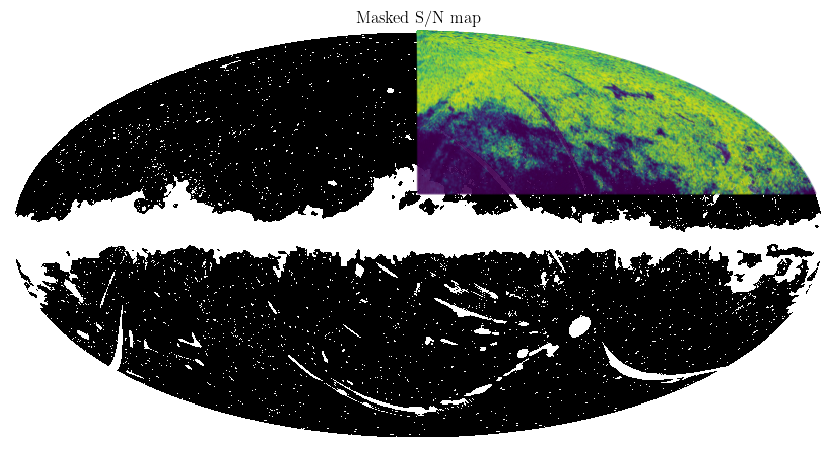

In [23]:
cluster_map = pd.read_csv("output/Locations/C1_nA/Q1_scan_fs.csv")

import healpy as hp
pl143 = hp.read_map('data/mask_comprass.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False)
hp.visufunc.projscatter(cluster_map['glon'],cluster_map['glat'],lonlat=True,c=cluster_map['clusterp'],alpha = 0.2, s=1,vmin=0, vmax=1)

In [5]:
import healpy as hp
pl143 = enmap.read_map('data/act_dr5.01_s08s18_AA_f090_daynight_map.fits')
shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.reproject_to_healpix(pl143,shape=shape,wcs=wcs)
hp.mollview(map_pix,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False)

AttributeError: module 'pixell.reproject' has no attribute 'reproject_to_healpix'

In [ ]:
# Mapping catalogues

union = pd.read_csv("data/union3.csv")

union_cut = union[union.cat == 4]

c = SkyCoord(union_cut['amf_ra'],union_cut['amf_dec'],frame='icrs',unit='deg')
union_cut['glat'] = c.galactic.b.degree
union_cut['glon'] = c.galactic.l.degree

# union_cut2 = union[union.cat == 3]
# c = SkyCoord(union_cut2['amf_ra'],union_cut2['amf_dec'],frame='icrs',unit='deg')
# union_cut2['glat'] = c.galactic.b.degree
# union_cut2['glon'] = c.galactic.l.degree

import healpy as hp
pl143 = hp.read_map('data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False)
#hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
hp.visufunc.projscatter(union_cut['glon'],union_cut['glat'],lonlat=True,c="b",alpha = 0.5,s=1,vmin=0, vmax=1)

# hp.visufunc.projscatter(union_cut2['glon'],union_cut2['glat'],lonlat=True,c="g",alpha = 0.5,s=1,vmin=0, vmax=1)

In [ ]:
# dfsky_c contains all the detections
# dfsky is the dataframe of whole sky being tested 

# dfsky_c = dfsky.copy()
# dfsky_c['clusterp'] = countfs
# dfsky_c = dfsky_c[dfsky_c.clusterp>0.85]

# import healpy as hp
# pl143 = hp.read_map('data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
# hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False)
# # hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
# hp.visufunc.projscatter(dfsky_c['glon'],dfsky_c['glat'],lonlat=True,c=dfsky_c['clusterp'],s=1,vmin=0, vmax=1)
# plt.savefig('full_match_hz_rh50.png')

In [ ]:
dfsky_c

In [ ]:
import healpy as hp
pl143 = hp.read_map('data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False)
# hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
hp.visufunc.projscatter(dfsky_c['glon'],dfsky_c['glat'],lonlat=True,c=dfsky_c['clusterp'],s=1,vmin=0, vmax=1)
# plt.savefig('media/full_match_hz_rh50.png')

## OLD - Set up training/validation sets

#### Cluster sample

In [ ]:
# Note the slice by 3, eventually we want to use the full sample
df = pd.read_csv('data/union2.csv', skiprows = 0, index_col=0).reset_index(drop=True)[::3]
c = SkyCoord(df['amf_ra'],df['amf_dec'],frame='icrs',unit='deg')
df['glat'] = c.galactic.b.degree
df['glon'] = c.galactic.l.degree
df['i100'] = np.loadtxt('output/510u3/pr100.csv',delimiter=', ')
df['i143'] = np.loadtxt('output/510u3/pr143.csv',delimiter=', ')
df['i217'] = np.loadtxt('output/510u3/pr217.csv',delimiter=', ')
df['i353'] = np.loadtxt('output/510u3/pr353.csv',delimiter=', ')
df['i545'] = np.loadtxt('output/510u3/pr545.csv',delimiter=', ')
df['i857'] = np.loadtxt('output/510u3/pr857.csv',delimiter=', ')
df['i090'] = np.loadtxt('output/510u3/ar90.csv',delimiter=', ')
df['i150'] = np.loadtxt('output/510u3/ar150.csv',delimiter=', ')
df['i220'] = np.loadtxt('output/510u3/ar220.csv',delimiter=', ')
df['iros'] = np.loadtxt('output/510u3/rr.csv',delimiter=', ')
df['i12'] = np.loadtxt('output/510u3/ir12.csv',delimiter=', ')
df['i25'] = np.loadtxt('output/510u3/ir25.csv',delimiter=', ')
df['i60'] = np.loadtxt('output/510u3/ir60.csv',delimiter=', ')
df['i1002'] = np.loadtxt('output/510u3/ir100.csv',delimiter=', ')
df['i100_r'] = np.loadtxt('output/510u3/pr100_r.csv',delimiter=', ')
df['i143_r'] = np.loadtxt('output/510u3/pr143_r.csv',delimiter=', ')
df['i217_r'] = np.loadtxt('output/510u3/pr217_r.csv',delimiter=', ')
df['i353_r'] = np.loadtxt('output/510u3/pr353_r.csv',delimiter=', ')
df['i545_r'] = np.loadtxt('output/510u3/pr545_r.csv',delimiter=', ')
df['i857_r'] = np.loadtxt('output/510u3/pr857_r.csv',delimiter=', ')
df['i090_r'] = np.loadtxt('output/510u3/ar90_r.csv',delimiter=', ')
df['i150_r'] = np.loadtxt('output/510u3/ar150_r.csv',delimiter=', ')
df['i220_r'] = np.loadtxt('output/510u3/ar220_r.csv',delimiter=', ')
df['iros_r'] = np.loadtxt('output/510u3/rr_r.csv',delimiter=', ')
df['i12_r'] = np.loadtxt('output/510u3/ir12_r.csv',delimiter=', ')
df['i25_r'] = np.loadtxt('output/510u3/ir25_r.csv',delimiter=', ')
df['i60_r'] = np.loadtxt('output/510u3/ir60_r.csv',delimiter=', ')
df['i1002_r'] = np.loadtxt('output/510u3/ir100_r.csv',delimiter=', ')

# If ACT included
df = df[df.i090!=-9999]
df['cluster'] = 1

In [ ]:
df = df[:20000]

#### Non-cluster sample

In [ ]:
df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.loadtxt('output/510/pv100.csv',delimiter=', ')
df2['i143'] = np.loadtxt('output/510/pv143.csv',delimiter=', ')
df2['i217'] = np.loadtxt('output/510/pv217.csv',delimiter=', ')
df2['i353'] = np.loadtxt('output/510/pv353.csv',delimiter=', ')
df2['i545'] = np.loadtxt('output/510/pv545.csv',delimiter=', ')
df2['i857'] = np.loadtxt('output/510/pv857.csv',delimiter=', ')
df2['i090'] = np.loadtxt('output/510/av90.csv',delimiter=', ')
df2['i150'] = np.loadtxt('output/510/av150.csv',delimiter=', ')
df2['i220'] = np.loadtxt('output/510/av220.csv',delimiter=', ')
df2['iros'] = np.loadtxt('output/510/rv.csv',delimiter=', ')
df2['i12'] = np.loadtxt('output/510u/iv12.csv',delimiter=', ')
df2['i25'] = np.loadtxt('output/510u/iv25.csv',delimiter=', ')
df2['i60'] = np.loadtxt('output/510u/iv60.csv',delimiter=', ')
df2['i1002'] = np.loadtxt('output/510u/iv100.csv',delimiter=', ')
df2['i100_r'] = np.loadtxt('output/510/pv100_r.csv',delimiter=', ')
df2['i143_r'] = np.loadtxt('output/510/pv143_r.csv',delimiter=', ')
df2['i217_r'] = np.loadtxt('output/510/pv217_r.csv',delimiter=', ')
df2['i353_r'] = np.loadtxt('output/510/pv353_r.csv',delimiter=', ')
df2['i545_r'] = np.loadtxt('output/510/pv545_r.csv',delimiter=', ')
df2['i857_r'] = np.loadtxt('output/510/pv857_r.csv',delimiter=', ')
df2['i090_r'] = np.loadtxt('output/510/av90_r.csv',delimiter=', ')
df2['i150_r'] = np.loadtxt('output/510/av150_r.csv',delimiter=', ')
df2['i220_r'] = np.loadtxt('output/510/av220_r.csv',delimiter=', ')
df2['iros_r'] = np.loadtxt('output/510/rv_r.csv',delimiter=', ')
df2['i12_r'] = np.loadtxt('output/510u/iv12_r.csv',delimiter=', ')
df2['i25_r'] = np.loadtxt('output/510u/iv25_r.csv',delimiter=', ')
df2['i60_r'] = np.loadtxt('output/510u/iv60_r.csv',delimiter=', ')
df2['i1002_r'] = np.loadtxt('output/510u/iv100_r.csv',delimiter=', ')

# Alpha re-scaling to increase sample size, in principle should just create more samples
df2u = df2.copy()
df2u.loc[::2,'i100':]*=1.1
df2u2 = df2.copy()
df2u2.loc[1::2,'i100':]*=1.1

df2d = df2.copy()
df2d.loc[1::2,'i100':]*=0.9
df2d2 = df2.copy()
df2d2.loc[::2,'i100':]*=0.9

df2 = pd.concat([df2,df2u,df2d,df2u2,df2d2]).reset_index(drop=True)
from sklearn.utils import shuffle
df2 = shuffle(df2)

# If ACT included
df2 = df2[df2.i090!=-9999].reset_index(drop=True)

df2['cluster'] = 0

# We want equal sample sizes
df2 = df2[:len(df)]

In [ ]:
df2

#### Full-sky sample

In [ ]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u

# The more points here the better
glon = []
glat = []
for lon in tqdm(np.linspace(180,360,540)):
    for lat in np.linspace(15,90,224):
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

dfsky = pd.DataFrame()#pd.read_csv('data/full_sky_decs.csv')[['decs']]
# dfsky['ras'] = pd.read_csv('data/full_sky_ras.csv')[['ras']]

dfsky['glat'] = glat
dfsky['glon'] = glon
dfsky['i100'] = np.loadtxt('output/510u3/pf100.csv',delimiter=', ')
dfsky['i143'] = np.loadtxt('output/510u3/pf143.csv',delimiter=', ')
dfsky['i217'] = np.loadtxt('output/510u3/pf217.csv',delimiter=', ')
dfsky['i353'] = np.loadtxt('output/510u3/pf353.csv',delimiter=', ')
dfsky['i545'] = np.loadtxt('output/510u3/pf545.csv',delimiter=', ')
dfsky['i857'] = np.loadtxt('output/510u3/pf857.csv',delimiter=', ')
dfsky['i090'] = np.loadtxt('output/510u3/af90.csv',delimiter=', ')
dfsky['i150'] = np.loadtxt('output/510u3/af150.csv',delimiter=', ')
dfsky['i220'] = np.loadtxt('output/510u3/af220.csv',delimiter=', ')
dfsky['iros'] = np.loadtxt('output/510u3/rf.csv',delimiter=', ')
dfsky['i12'] = np.loadtxt('output/510u3/if12.csv',delimiter=', ')
dfsky['i25'] = np.loadtxt('output/510u3/if25.csv',delimiter=', ')
dfsky['i60'] = np.loadtxt('output/510u3/if60.csv',delimiter=', ')
dfsky['i1002'] = np.loadtxt('output/510u3/if100.csv',delimiter=', ')
dfsky['i100_r'] = np.loadtxt('output/510u3/pf100_r.csv',delimiter=', ')
dfsky['i143_r'] = np.loadtxt('output/510u3/pf143_r.csv',delimiter=', ')
dfsky['i217_r'] = np.loadtxt('output/510u3/pf217_r.csv',delimiter=', ')
dfsky['i353_r'] = np.loadtxt('output/510u3/pf353_r.csv',delimiter=', ')
dfsky['i545_r'] = np.loadtxt('output/510u3/pf545.csv',delimiter=', ')
dfsky['i857_r'] = np.loadtxt('output/510u3/pf857.csv',delimiter=', ')
dfsky['i090_r'] = np.loadtxt('output/510u3/af90_r.csv',delimiter=', ')
dfsky['i150_r'] = np.loadtxt('output/510u3/af150_r.csv',delimiter=', ')
dfsky['i220_r'] = np.loadtxt('output/510u3/af220_r.csv',delimiter=', ')
dfsky['iros_r'] = np.loadtxt('output/510u3/rf_r.csv',delimiter=', ')
dfsky['i12_r'] = np.loadtxt('output/510u3/if12_r.csv',delimiter=', ')
dfsky['i25_r'] = np.loadtxt('output/510u3/if25_r.csv',delimiter=', ')
dfsky['i60_r'] = np.loadtxt('output/510u3/if60_r.csv',delimiter=', ')
dfsky['i1002_r'] = np.loadtxt('output/510u3/if100_r.csv',delimiter=', ')

# If ACT included
dfsky = dfsky[dfsky.i090!=-9999].reset_index(drop=True)

dfsky['cluster'] = 2

#### Training sample

In [ ]:
# Half to train on [::2]

filtered_c = df.loc[::2,'i100':'i1002_r'].reset_index(drop=True)
clusters = [list(filtered_c.loc[i].values) for i in range(len(filtered_c))]

filtered_nc = df2.loc[::2,'i100':'i1002_r'].reset_index(drop=True)
nonclusters = [list(filtered_nc.loc[i].values) for i in range(len(filtered_nc))]

filtered_fs = dfsky.loc[::2,'i100':'i1002_r'].reset_index(drop=True)
fsclusters = [list(filtered_fs.loc[i].values) for i in range(len(filtered_fs))]

In [ ]:
# Objects is all signals for clusters, followed by all signals for nonclusters
# Labels, 1s then 0s

tot = clusters+nonclusters
objects = (tot)
labels = list(np.ones(len(clusters)))+list(np.zeros(len(nonclusters)))

#### Validation sample

In [ ]:
# Other half, offset by 1 

filtered_cv = df.loc[1::2,'i100':'i1002_r'].reset_index(drop=True)
clustersv = [list(filtered_cv.loc[i].values) for i in range(len(filtered_cv))]

filtered_ncv = df2.loc[1::2,'i100':'i1002_r'].reset_index(drop=True)
nonclustersv = [list(filtered_ncv.loc[i].values) for i in range(len(filtered_ncv))]

filtered_fsv = dfsky.loc[1::2,'i100':'i1002_r'].reset_index(drop=True)
fsclustersv = [list(filtered_fsv.loc[i].values) for i in range(len(filtered_fsv))]

#### Full, combined, cluster+non-cluster sample

In [ ]:
df3 = df.append(df2, ignore_index=True).reset_index(drop=True)

#### Visualization of hyperspace

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

Input = df3.loc[:,'i100':'i1002_r']
norm_X = MinMaxScaler().fit_transform(Input)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(norm_X)
evr = np.cumsum(pca.explained_variance_ratio_)
print(evr)
X_pca=pd.DataFrame(X_pca)
X_pca.columns=["pc1","pc2","pc3"]
X_pca["cluster"]=df3["cluster"]

# fig = px.scatter_3d(X_pca, x='pc1', y='pc2', z='pc3',color='cluster',title="Iris 3D")
fig = px.scatter_3d(X_pca, x='pc1', y='pc2', z='pc3',color='cluster',title="Clusters, Nonclusters, Fullsky")
fig.update_traces(marker_coloraxis=None)
fig.show()

### Set up FastMap

#### Feed in training set to algo

In [ ]:
fastmap_svm = FastMapSVM(objects, labels, distance.canberra)
fastmap_svm.fit(20,1000)

#### For each cluster in the validation set, check how the algo classifies it

In [ ]:
# clustersv --> validation sample

countc=[]
for i in tqdm(range(len(clustersv))):
    res = fastmap_svm.predict(clustersv[i])
    countc.append(res[1])

plt.hist(countc,bins=100,color='darkgreen')
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)

In [ ]:
# Check how many clusters are identified with probability over 80%
count = np.array(countc)
num_c = len(count[count>0.8])

#### Same shit for non-clusters

In [ ]:
# validation sample, non clusters

countnc=[]
for i in tqdm(range(len(nonclustersv))):
    res = fastmap_svm.predict(nonclustersv[i])
    countnc.append(res[1])
    
plt.hist(countnc,bins=100,color='maroon')
plt.xlabel('Probability of location containing a cluster\n[Non-cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
plt.tight_layout()
# plt.savefig('nc_full.png',dpi=1000)

In [ ]:
count = np.array(countnc)
num_nc = len(count[count>0.8])
num_nc

#### Purity from cluster/non-cluster counts

In [ ]:
num_c/(num_c+num_nc)

#### Now for full-sky

In [ ]:
countfs=[]
for i in tqdm(range(len(fsclustersv))):
    res = fastmap_svm.predict(fsclustersv[i])
    countfs.append(res[1])
    
plt.hist(countfs,bins=100,color='slategrey')
plt.xlabel('Probability of location containing a cluster\n[Full-sky scan]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
plt.axvline(0.85,c='k',label='Detection threshold')
plt.legend()
plt.savefig('fs_full.png')

In [ ]:
dfval = dfsky.loc[1::2].copy()
dfval['clusterp'] = countfs

In [ ]:
dfval2 = dfval[dfval.clusterp>0.95]

In [ ]:
dfval2.clusterp.mean()

#### Plot fsky detections

In [ ]:
import healpy as hp
pl143 = hp.read_map('data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False)
# hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
hp.visufunc.projscatter(dfval2['glon'],dfval2['glat'],lonlat=True,c=dfval2['clusterp'],s=10,vmin=0, vmax=1)
#plt.savefig('full_match_hz.png')

#### Set up master catalog for matching

In [ ]:
comprass = pd.read_csv('data/comprass.tsv',sep='\t',names=['ra','dec','glon','glat','snr','z','m500'])
c = SkyCoord(comprass['ra'],comprass['dec'],frame='icrs',unit='deg')
comprass['glat'] = c.galactic.b.degree
comprass['glon'] = c.galactic.l.degree
comprass['beam'] = 1.8
comprass['cat'] = 0

phz = pd.read_csv('data/phz.tsv',sep='\t',names=['ra','dec','glon','glat','snr857','snr545','353','zph25k'])
c = SkyCoord(phz['ra'],phz['dec'],frame='icrs',unit='deg')
phz['glat'] = c.galactic.b.degree
phz['glon'] = c.galactic.l.degree
phz['beam'] = 5
phz['cat'] = 1

from astropy.table import Table

act = pd.read_csv('data/act.tsv',sep='\t',names=['ra','dec','glon','glat'])[:0]
table = Table.read('data/DR5_cluster-catalog_v1.0b3.fits')
act['ra'] = np.array(table['RADeg'])
act['dec'] = np.array(table['decDeg'])
c = SkyCoord(act['ra'],act['dec'],frame='icrs',unit='deg')
act['glat'] = c.galactic.b.degree
act['glon'] = c.galactic.l.degree
act['beam'] = 1.8
act['cat'] = 2

pszspt = pd.read_csv('data/pszspt.tsv',sep='\t',names=['ra','dec','glon','glat','snr','z','m500'])
c = SkyCoord(pszspt['ra'],pszspt['dec'],frame='icrs',unit='deg')
pszspt['glat'] = c.galactic.b.degree
pszspt['glon'] = c.galactic.l.degree
pszspt['beam'] = 5
pszspt['cat'] = 3

redmapper = pd.read_csv('data/redmapper.tsv',sep='\t',names=['ra','dec','glon','glat','z','lambda','S'])
c = SkyCoord(redmapper['ra'],redmapper['dec'],frame='icrs',unit='deg')
redmapper['glat'] = c.galactic.b.degree
redmapper['glon'] = c.galactic.l.degree
redmapper['beam'] = 5
redmapper['cat'] = 4

whl = pd.read_csv('data/whl.tsv',sep='\t',names=['ra','dec','glon','glat','z'])
c = SkyCoord(whl['ra'],whl['dec'],frame='icrs',unit='deg')
whl['glat'] = c.galactic.b.degree
whl['glon'] = c.galactic.l.degree
whl['beam'] = 5
whl['cat'] = 5

erosita = pd.read_csv('data/erosita.tsv',sep='\t',names=['ra','dec','glon','glat'])
c = SkyCoord(erosita['ra'],erosita['dec'],frame='icrs',unit='deg')
erosita['glat'] = c.galactic.b.degree
erosita['glon'] = c.galactic.l.degree
erosita['beam'] = 5
erosita['cat'] = 6

mard = pd.read_csv('data/mard.tsv',sep='\t',names=['ra','dec','z1','z2','z3','rh1','rh2','rh3'])
c = SkyCoord(mard['ra'],mard['dec'],frame='icrs',unit='deg')
mard['glat'] = c.galactic.b.degree
mard['glon'] = c.galactic.l.degree
mard['beam'] = 5
mard['cat'] = 7

mcxc = pd.read_csv('data/mcxc.tsv',sep='\t',names=['ra','dec','z','l500','m500','r500'])
c = SkyCoord(mcxc['ra'],mcxc['dec'],frame='icrs',unit='deg')
mcxc['glat'] = c.galactic.b.degree
mcxc['glon'] = c.galactic.l.degree
mcxc['beam'] = 5
mcxc['cat'] = 8

catalogs = pd.concat([comprass,mard,mcxc,erosita,whl,redmapper,pszspt,phz]).reset_index(drop=True)

#### Do the matching: In Progress!!

In [ ]:
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils

c = SkyCoord(dfval2['glon'],dfval2['glat'],frame='galactic',unit='deg')
dfval2['ra'] = c.icrs.ra.degree
dfval2['dec'] = c.icrs.dec.degree

dfval3 = dfval2[['glat','glon','ra','dec','clusterp']].reset_index(drop=True)

# Create a list to store indices 
indices1 = []
indices2 = []
rows = []
matches1 = dfval3[:0].copy()
matches2 = catalogs[:0].copy()

count = 0
# Iterate through each row in df
for index in tqdm(range(len(dfval3))):
    row = dfval3.iloc[index]
    # Iterate through each row in df2
    matched = []
    for index2, row2 in catalogs.iterrows():
        if row2['cat'] in matched:
            continue

        p1 = np.deg2rad([row['dec'], row['ra']])
        p2 = np.deg2rad([row2['dec'], row2['ra']])
        sep = 
        # Check if the glat and glon values are within 0.5
        if (< (row2['beam'])):
            print(row['dec'],row2['dec'],row['ra'],row2['ra'],p1[0]-p2[0],p1[1]-p2[1])
#             print("Match in ", row2['cat'])
            # Append indices to list
            count+=1
            indices2.append(index2)
            matches1.loc[len(matches1)] = row
            matches2.loc[len(matches2)] = row2
            matched.append(row2['cat'])
        else:
            indices1.append(index)

In [ ]:
c1 = SkyCoord(80.5, 30, unit='deg', frame='icrs')
c2 = SkyCoord(81, 30, unit='deg', frame='icrs')
c1.separation(c2).rad

In [ ]:
sep = np.arccos(np.sin(np.deg2rad(row['dec']))*np.sin(np.deg2rad(row2['dec'])) + np.cos(np.deg2rad(row['dec']))*np.cos(np.deg2rad(row2['dec']))*np.cos(np.deg2rad(row['ra']) - np.deg2rad(row2['ra'])))
sep

In [ ]:
import healpy as hp
pl143 = hp.read_map('data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map')
# hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
hp.visufunc.projscatter(catalogs['glon'],catalogs['glat'],lonlat=True,s=10,vmin=0, vmax=1)